### Data Background

Ford GoBike is a regional public bike sharing system in the San Francisco Bay Area, California. The dataset used for this exploratory analysis consists of monthly individual trip data from February, 2019 in CSV format covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe and clean up field dtypes
data = pd.read_csv('fordgobike_trips_clean.csv')

data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

data['start_station_id'] = data['start_station_id'].astype('str')
data['end_station_id'] = data['end_station_id'].astype('str')
data['bike_id'] = data['bike_id'].astype('str')

data['user_type'] = data['user_type'].astype('category')
data['member_gender'] = data['member_gender'].astype('category')

data['member_birth_year'] = data['member_birth_year'].astype('int')
data['age_of_rider'] = data['age_of_rider'].astype('int')

days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_of_the_week_categorization = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_the_week)
data['trip_start_day_of_week'] = data['trip_start_day_of_week'].astype(days_of_the_week_categorization)

data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173524 entries, 0 to 173523
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173524 non-null  int64         
 1   start_time               173524 non-null  datetime64[ns]
 2   end_time                 173524 non-null  datetime64[ns]
 3   start_station_id         173524 non-null  object        
 4   start_station_name       173524 non-null  object        
 5   start_station_latitude   173524 non-null  float64       
 6   start_station_longitude  173524 non-null  float64       
 7   end_station_id           173524 non-null  object        
 8   end_station_name         173524 non-null  object        
 9   end_station_latitude     173524 non-null  float64       
 10  end_station_longitude    173524 non-null  float64       
 11  bike_id                  173524 non-null  object        
 12  user_type       

### User types and their Weekday Usage


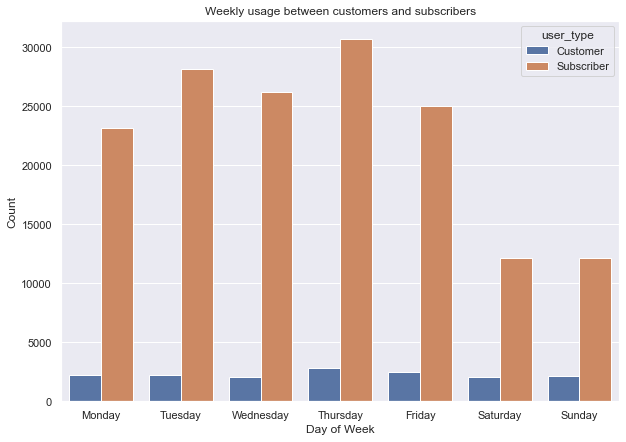

In [3]:
plt.rcParams['figure.figsize'] = 10, 7
sns.countplot(data=data, x='trip_start_day_of_week', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title("Weekly usage between customers and subscribers")
plt.show()

**Inferences**

>> Overall, there were far more subscribers than customers. The decrease in volume on weekends for subscribers suggests that they predominantly use bikes for commuting to and from work during the week, whereas the minor increase in usage on weekends for consumers indicates that they largely use bikes for leisure/touring and relaxing purposes.

### Percentage of usertype

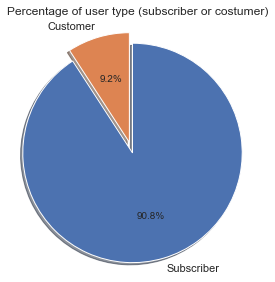

In [4]:
plt.subplot(1, 2, 1);
sorted_vals = data.user_type.value_counts()/data.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');
plt.title('Percentage of user type (subscriber or costumer)')
plt.show()

**Inferences**

>> Subscribers contributed the majority of the bike usage in February 2019, about 90.8%, while about 9.2% were consumed by cusomters (or casual users).

### Daily (hours of days) usage between  user type (customers and subscribers)

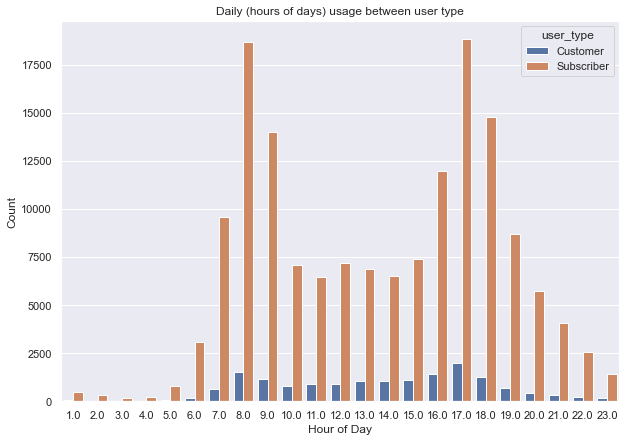

In [5]:
sns.countplot(data=data, x='trip_start_hour_of_day', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');
plt.title('Daily (hours of days) usage between user type')
plt.show()

**Inference**

>> Monday through Friday, while customers ride frequently on weekends, particularly in the afternoon. Many subscribers' travels are concentrated between 7:00 a.m. and 7:00 p.m. and 4:00 p.m. and 7:00 p.m. on weekdays, however customers tend to utilize the service more in the late afternoon around 5:00 p.m. Subscriber usage obviously rises during normal rush hours, when people are going to work in the morning and leaving work in the afternoon, and double-verified their usage reason and riding objective. Unlike subscriber riders, customers who typically travel in the afternoon or early evening for a different purpose do not exhibit a similar trend.

### Average Weekday Trip Duration for User Type (Customers and Subscribers)

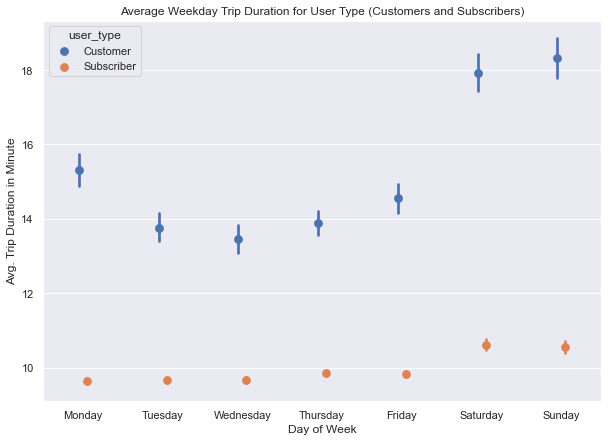

In [6]:
sns.pointplot(data=data, x='trip_start_day_of_week', y='duration_minutes', hue='user_type', dodge=0.1, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('Average Weekday Trip Duration for User Type (Customers and Subscribers)')
plt.show()

**Inferences**

>>Each day of the week, subscribers take shorter/quicker trips compared to customers, as shown in the above graph. On Saturdays and Sundays, trip duration increases significantly for both user segments, especially for casual riders. Monday through Friday, the average duration of subscribers' usage was much more stable than that of customers as a whole.

### Average Weekday Trip Duration for User Type (Customers and Subscribers) based on Member Gender

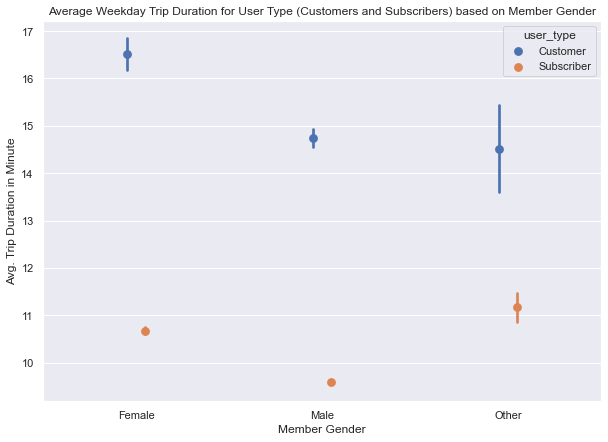

In [7]:
sns.pointplot(data=data, x='member_gender', y='duration_minutes', hue='user_type', dodge=0.1, linestyles="");
plt.xlabel('Member Gender');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('Average Weekday Trip Duration for User Type (Customers and Subscribers) based on Member Gender')
plt.show()

**Inferences**

>> The above graph demonstrates that female customers ride longer/more slowly than male/other gender customers, who go significantly shorter/faster. In addition, female gender subscribers ride more longer/more slowly than male/other gender subscribers, who ride lot shorter/faster on their journeys.



### Summary

>> Exploration reveals that the two types of riders have distinct usage patterns/habits. The system is highly utilized by subscribers on weekdays, i.e., Monday through Friday, while customers ride frequently on weekends, particularly in the afternoon. Many subscribers' travels are concentrated between 7:00 a.m. and 7:00 p.m. and 4:00 p.m. and 7:00 p.m. on weekdays, however customers tend to utilize the service more in the late afternoon around 5:00 p.m. The efficient/short time of usage for subscribers corresponds to their high concentration during rush hours Monday through Friday, showing that the consumption is mostly for commuting to and from work. The more relaxed and flexible usage pattern of customers indicates that they are using the bike-sharing system considerably differently than subscribers, primarily on weekends and in the afternoons, likely for city tours or recreational purposes.

In [ ]:
!jupyter nbconvert FordGoBike_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook FordGoBike_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 704085 bytes to FordGoBike_Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/FordGoBike_Slide_Deck.slides.html
Use Control-C to stop this server
